In [1]:
import pandas as pd

ae_name = 'diarrhoea'

df = pd.read_csv(f'data_normalized_{ae_name}.csv')
df

,drug,SMILES,appendix endocrine cells,urinary bladder urothelial cells,colon mucosal lymphoid cells,skeletal muscle myocytes,nasopharynx ciliated cells (ciliary rootlets),skin 2 extracellular matrix,kidney cells in tubules,soft tissue 2 peripheral nerve,...,breast myoepithelial cells,cerebellum synaptic glomeruli - capsule,liver cholangiocytes,bronchus goblet cells,cerebellum processes in white matter,endometrium nonciliated luminal epithelial cells,skin 1 arrector pili muscle cells,endometrium macrophages,appendix germinal center cells,diarrhoea
0,telithromycin,CC[C@@H]1[C@@]2([C@@H]([C@H](C(=O)[C@@H](C[C@@...,-1.663664,-1.731440,-1.554609,-1.783875,-1.114384,-1.321797,-1.724248,-1.642483,...,-1.752763,-1.087099,-1.794477,-2.151840,-1.115659,-0.665196,-2.072791,-0.350386,-1.635042,1
1,lamivudine,C1[C@H](O[C@H](S1)CO)N2C=CC(=NC2=O)N,1.049973,0.852049,0.778864,0.889209,1.159721,0.132526,0.916193,0.930708,...,0.862569,0.695510,0.833929,0.745644,1.306276,0.688898,1.273272,0.479819,0.762787,1
2,levetiracetam,CC[C@@H](C(=O)N)N1CCCC1=O,0.337857,0.328799,0.091201,0.393675,0.055617,0.083213,0.386478,0.421253,...,0.394376,0.070901,0.363912,0.585146,0.337385,-0.175902,0.722797,-0.308238,0.200970,1
3,azathioprine,CN1C=NC(=C1SC2=NC=NC3=C2NC=N3)[N+](=O)[O-],0.447913,0.158322,0.260269,0.143417,0.960711,0.233472,0.187817,0.227648,...,0.136027,0.086840,0.168978,-0.378821,0.699918,0.407155,0.440944,0.286999,0.280644,0
4,aminophylline,CN1C2=C(C(=O)N(C1=O)C)NC=N2.CN1C2=C(C(=O)N(C1=...,0.712860,0.586288,0.502462,0.639515,1.939824,0.817198,0.706717,0.655414,...,0.612074,0.479249,0.629248,0.115850,1.176758,-0.302760,0.662082,-0.570832,0.487186,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,morphine,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,0.535588,0.506711,0.449502,0.514845,0.819062,-0.112120,0.489169,0.457299,...,0.452481,0.567804,0.513020,0.414430,0.211166,0.047384,0.058933,-0.031116,0.545457,1
469,clofarabine,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,2.248751,2.067395,1.893965,2.103322,3.462149,1.870588,2.180384,2.135745,...,2.084035,2.057966,2.111154,1.586496,3.188976,1.277663,2.207860,0.769457,1.821616,1
470,cabazitaxel,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...,-2.444512,-2.305256,-2.250296,-2.252377,-1.387748,-1.228835,-2.268095,-2.252082,...,-2.299520,-2.399920,-2.322255,-2.227677,-2.286980,-1.800448,-2.160687,-1.807827,-2.109181,1
471,aclidinium.bromide,C1C[N+]2(CCC1C(C2)OC(=O)C(C3=CC=CS3)(C4=CC=CS4...,-1.343383,-1.372863,-1.253938,-1.324322,-0.530480,-0.324008,-1.312071,-1.388030,...,-1.357167,-1.862296,-1.326043,-1.658394,-1.802785,-1.921565,-1.016166,-1.774099,-1.251880,1


In [2]:
from utils import *

In [3]:
# df = process(df)
df = df.drop(columns=['drug', 'SMILES'])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(df, df[ae_name]):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]
test_df

,appendix endocrine cells,urinary bladder urothelial cells,colon mucosal lymphoid cells,skeletal muscle myocytes,nasopharynx ciliated cells (ciliary rootlets),skin 2 extracellular matrix,kidney cells in tubules,soft tissue 2 peripheral nerve,skin 2 fibrohistiocytic cells,caudate neuronal cells,...,breast myoepithelial cells,cerebellum synaptic glomeruli - capsule,liver cholangiocytes,bronchus goblet cells,cerebellum processes in white matter,endometrium nonciliated luminal epithelial cells,skin 1 arrector pili muscle cells,endometrium macrophages,appendix germinal center cells,diarrhoea
269,-0.255098,-0.374681,-0.130540,-0.371406,0.357336,0.745311,-0.415224,-0.446334,-0.091456,-0.396696,...,-0.445148,-0.372420,-0.344515,-0.341701,-0.439033,0.252331,-0.312753,0.107839,-0.079293,1
301,0.493887,0.297804,0.535830,0.309236,0.804414,0.486275,0.353558,0.333809,0.614719,0.237425,...,0.292718,-0.265320,0.304001,-0.021768,0.343034,1.420543,0.446447,1.158917,0.258242,1
294,-0.233281,-1.300093,-0.753311,-1.299809,-1.380797,-0.950810,-1.293413,-1.396676,-0.895912,-1.397713,...,-1.357875,-1.999539,-1.151066,-1.017458,-1.421828,-2.018448,1.408468,-0.567874,-1.092674,1
292,-1.161568,-1.427061,-1.776987,-1.256742,-1.019899,-0.751937,-1.375607,-1.166924,-1.651554,-1.199209,...,-1.346092,-0.900420,-1.340523,-0.759317,-0.648965,-2.463196,-0.441576,-2.452308,-1.297960,1
71,-0.254507,-0.472362,-0.571585,-0.454021,-0.418773,0.181748,-0.492475,-0.433249,-0.605831,-0.382302,...,-0.442189,-0.101356,-0.407653,-0.252337,-0.141251,-1.226524,0.115651,-1.435005,-0.165460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.379703,0.756867,0.542375,0.792892,0.843694,0.020352,0.703153,0.700291,0.645291,0.750612,...,0.702032,0.882595,0.747444,1.103347,0.355899,0.493632,-0.173550,0.195053,0.574971,1
436,-1.114480,-1.288168,-0.868760,-1.265589,-0.645442,-0.739240,-1.273547,-1.299073,-0.913106,-1.330554,...,-1.308677,-1.522502,-1.274725,-1.368581,-1.553860,-0.218622,-1.020768,0.271836,-1.148150,1
48,0.359219,0.580301,0.419209,0.698759,0.724169,1.488837,0.674619,0.692166,0.398867,0.700180,...,0.685307,0.245442,0.629305,0.577142,0.297654,0.010117,0.142668,-0.300588,0.545997,1
368,-0.051119,-0.479200,-0.623926,-0.516108,-0.486624,-1.300747,-0.525438,-0.492442,-0.481136,-0.456477,...,-0.525177,0.098443,-0.445898,-0.102115,0.322725,-1.167771,0.761247,-0.785792,-0.526730,1


In [5]:
# train_df = train_df.reset_index(drop=True)

# for train_index, val_index in split.split(train_df, train_df[ae_name]):
#     val_df = train_df.loc[val_index]
#     train_df = train_df.loc[train_index]
# val_df

In [6]:
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import pickle
import numpy as np

class Classifier(nn.Module):
    def __init__(self, in_dim, h_dims:list):
        super(Classifier, self).__init__()

        neurons = [in_dim, *h_dims]
        linear_layers = [nn.Linear(neurons[i-1], neurons[i]) \
                         for i in range(1, len(neurons))]
        self.hidden = nn.ModuleList(linear_layers)
        # self.emb = nn.GRU(h_dims[-1], h_dims[-1])
        self.final = nn.Linear(h_dims[-1], 1)
        self.output = nn.Sigmoid()

    def forward(self, x):
        for layer in self.hidden:
            x = F.relu(layer(x))
        # x = torch.squeeze(self.output(self.final(x)))
        x = torch.squeeze(self.output(self.final(x)))
        return x

class tox_dataset(Dataset):
    def __init__(self, df):
        self.len = len(df)
        self.df = df
        self.ic_start_ind = df.columns.get_loc("appendix endocrine cells")
        self.ae_start_ind = df.columns.get_loc(ae_name)

    def __getitem__(self, idx):
        """
        OUTPUT
        :param fp: fingerprint, should be 167 dim
        :param ic: drug tissue concentration
        :param ae: adverse events
        """
        # header = ['bit' + str(i) for i in range(167)]
        # fp = self.df[header]
        # fp = torch.tensor([float(b) for b in fp.iloc[idx]], dtype=torch.float32)
        ic = self.df.iloc[:, self.ic_start_ind:self.ae_start_ind]
        ic = torch.tensor(ic.values.astype(np.float32))[idx]
        ae = self.df.iloc[:, self.ae_start_ind:]
        ae = torch.tensor(ae.values.astype(np.float32))[idx]
        # ae = onehot(5)(ae) # use onehot 
        # return fp, ic, ae.float()
        return ic, ae.float()
    def __len__(self): return self.len


In [7]:
# dataset test, select first row
# fp, ic, ae = tox_dataset(train_df)[0]
# fp, ic, ae
ic, ae = tox_dataset(train_df)[0]
ic, ae

(tensor([ 3.6611e-01,  5.3561e-01,  5.1890e-01,  5.9036e-01, -1.2562e-01,
          8.7762e-01,  5.6934e-01,  6.0753e-01,  3.4374e-01,  5.8402e-01,
          3.8145e-01,  5.6191e-01,  2.3029e-01,  8.7762e-01,  4.5330e-01,
         -1.9719e-01,  2.4390e-01,  5.8574e-01,  2.8071e-01,  3.2488e-01,
          5.8870e-01,  3.7750e-01,  3.4937e-02,  5.5471e-01,  3.4801e-01,
          2.2217e-01,  4.6014e-02,  6.1439e-01,  6.3239e-01,  5.6125e-01,
          6.2096e-01,  2.9113e-01,  5.8541e-01,  4.0186e-01,  6.3786e-01,
          5.1251e-01,  1.0588e+00,  5.9137e-01,  5.1547e-01,  6.0790e-01,
          6.0557e-01,  5.8878e-01,  3.7273e-01,  3.8150e-01,  7.0596e-01,
          3.5664e-01,  5.7350e-01,  5.8371e-01,  5.9949e-01,  5.4055e-01,
          6.0639e-01,  3.5268e-01,  5.4630e-01, -4.8311e-01,  3.3854e-01,
          1.3948e-01,  2.7236e-01,  6.5488e-01, -1.7273e-01,  7.0122e-01,
          5.3266e-01, -1.2245e-01,  5.9118e-01,  4.2269e-01, -1.2245e-01,
          4.4060e-01,  4.8143e-01, -1.

In [8]:
# batch_size is changeable
params = {'batch_size':64, 'shuffle':True,
          'drop_last':False, 'num_workers': 0}

# train_loader = DataLoader(tox_dataset(train_df), **params)
# val_loader = DataLoader(tox_dataset(val_df), **params)
# test_loader = DataLoader(tox_dataset(test_df), **params)

In [9]:
import torch.optim as optim
from dgllife.utils import EarlyStopping

# hidden dims of neural network are changeable,
# as long as its all integers
h_dims = [1000, 256*2, 256, 128]
dropout = 0.1

lr = 1e-5 # learning rate, try 1e-5
wd = 1e-5 # weight decay try 1e-5
best_epoch = 0
MAX_EPOCH = 300
model_path = 'test.pt'
patience = 30
stopper = EarlyStopping(mode='lower', patience=patience)
verbose_freq = 10 # print out results every 10 epochs
##############################################

# BELOW IS NOT CHANGEABLE
in_dim = ic.shape[0]

# num_tasks = ae.shape[0] # the number of tasks
# task_classes = 6 # the label should be in [0, 1, 2, 3, 4, 5]
# task_list = [task_classes] * num_tasks

# model = Classifier(in_dim, h_dims)
# if torch.cuda.is_available(): model = model.cuda()

# optimizer = optim.AdamW(params=model.parameters(), lr=lr, weight_decay=wd)


Fold 1
-------
Epoch:0 [Train] Loss:3765.401 |  [Valid] Loss: 2439.206	SAVE MODEL: loss drop: inf -> 2439.206
Epoch:1 [Train] Loss:3763.269 |  [Valid] Loss: 2332.267	SAVE MODEL: loss drop: 2439.206 -> 2332.267
Epoch:2 [Train] Loss:3761.288 |  [Valid] Loss: 2330.736	SAVE MODEL: loss drop: 2332.267 -> 2330.736
Epoch:3 [Train] Loss:3759.378 |  [Valid] Loss: 2329.251	SAVE MODEL: loss drop: 2330.736 -> 2329.251
Epoch:4 [Train] Loss:3758.186 |  [Valid] Loss: 2221.432	SAVE MODEL: loss drop: 2329.251 -> 2221.432
Epoch:5 [Train] Loss:3758.869 |  [Valid] Loss: 2435.303	EarlyStopping counter: 1 out of 30
Epoch:6 [Train] Loss:3757.508 |  [Valid] Loss: 2326.252	EarlyStopping counter: 2 out of 30
Epoch:7 [Train] Loss:3756.951 |  [Valid] Loss: 2325.622	EarlyStopping counter: 3 out of 30
Epoch:8 [Train] Loss:3754.242 |  [Valid] Loss: 2214.733	SAVE MODEL: loss drop: 2221.432 -> 2214.733
Epoch:9 [Train] Loss:3751.923 |  [Valid] Loss: 2323.869	EarlyStopping counter: 1 out of 30
Epoch:10 [Train] Loss:3753

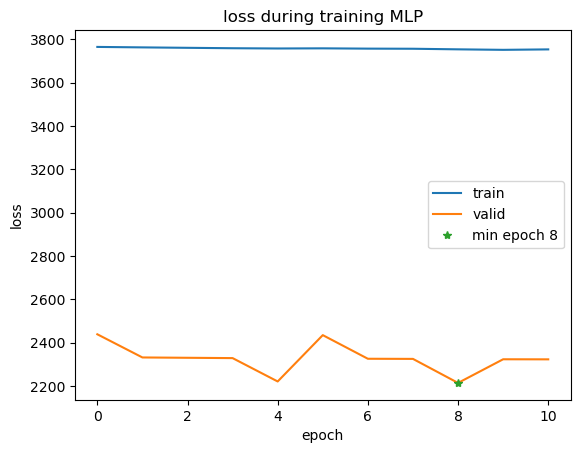

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.488 &  nan &0.930

Epoch:11 [Train] Loss:3753.162 |  [Valid] Loss: 2213.231	SAVE MODEL: loss drop: 2214.733 -> 2213.231
Epoch:12 [Train] Loss:3753.642 |  [Valid] Loss: 2102.113	SAVE MODEL: loss drop: 2213.231 -> 2102.113
Epoch:13 [Train] Loss:3754.255 |  [Valid] Loss: 2209.283	EarlyStopping counter: 1 out of 30
Epoch:14 [Train] Loss:3750.922 |  [Valid] Loss: 2433.375	EarlyStopping counter: 2 out of 30
Epoch:15 [Train] Loss:3700.566 |  [Valid] Loss: 2320.615	EarlyStopping counter: 3 out of 30
Epoch:16 [Train] Loss:3753.316 |  [Valid] Loss: 2433.602	EarlyStopping counter: 4 out of 30
Epoch:17 [Train] Loss:3749.102 |  [Valid] Loss: 2431.786	EarlyStopping counter: 5 out of 30
Epoch:18 [Train] Loss:3755.620 |  [Valid] Loss: 2206.152	EarlyStopping counter: 6 out of 30
Epoch:19 [Train] Loss:3699.590 |  [Valid]

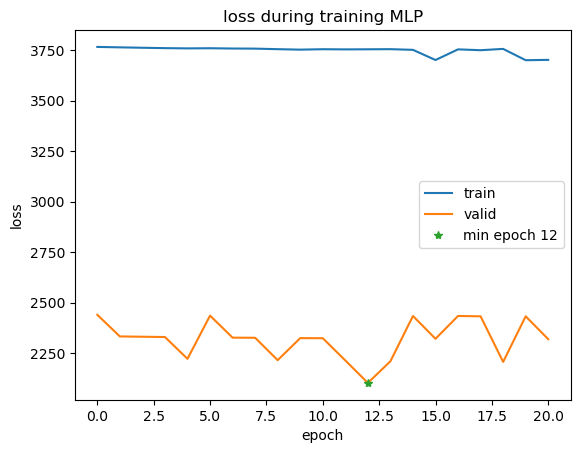

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.498 &  nan &0.932

Epoch:21 [Train] Loss:3749.350 |  [Valid] Loss: 2204.273	EarlyStopping counter: 9 out of 30
Epoch:22 [Train] Loss:3745.183 |  [Valid] Loss: 2318.107	EarlyStopping counter: 10 out of 30
Epoch:23 [Train] Loss:3751.773 |  [Valid] Loss: 2203.226	EarlyStopping counter: 11 out of 30
Epoch:24 [Train] Loss:3752.351 |  [Valid] Loss: 2084.993	SAVE MODEL: loss drop: 2102.113 -> 2084.993
Epoch:25 [Train] Loss:3749.553 |  [Valid] Loss: 2429.675	EarlyStopping counter: 1 out of 30
Epoch:26 [Train] Loss:3750.421 |  [Valid] Loss: 2316.713	EarlyStopping counter: 2 out of 30
Epoch:27 [Train] Loss:3748.255 |  [Valid] Loss: 2203.522	EarlyStopping counter: 3 out of 30
Epoch:28 [Train] Loss:3751.257 |  [Valid] Loss: 2316.825	EarlyStopping counter: 4 out of 30
Epoch:29 [Train] Loss:3748.663 |  [Valid] Loss: 

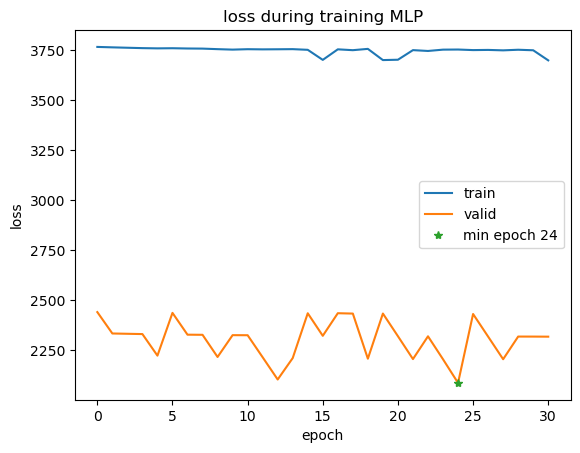

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.525 &  nan &0.937

Epoch:31 [Train] Loss:3749.568 |  [Valid] Loss: 2433.020	EarlyStopping counter: 7 out of 30
Epoch:32 [Train] Loss:3748.220 |  [Valid] Loss: 2200.752	EarlyStopping counter: 8 out of 30
Epoch:33 [Train] Loss:3750.425 |  [Valid] Loss: 2428.554	EarlyStopping counter: 9 out of 30
Epoch:34 [Train] Loss:3696.889 |  [Valid] Loss: 2315.653	EarlyStopping counter: 10 out of 30
Epoch:35 [Train] Loss:3749.640 |  [Valid] Loss: 2315.581	EarlyStopping counter: 11 out of 30
Epoch:36 [Train] Loss:3748.696 |  [Valid] Loss: 2080.002	SAVE MODEL: loss drop: 2084.993 -> 2080.002
Epoch:37 [Train] Loss:3746.981 |  [Valid] Loss: 2198.566	EarlyStopping counter: 1 out of 30
Epoch:38 [Train] Loss:3748.658 |  [Valid] Loss: 2314.894	EarlyStopping counter: 2 out of 30
Epoch:39 [Train] Loss:3744.434 |  [Valid] Loss: 

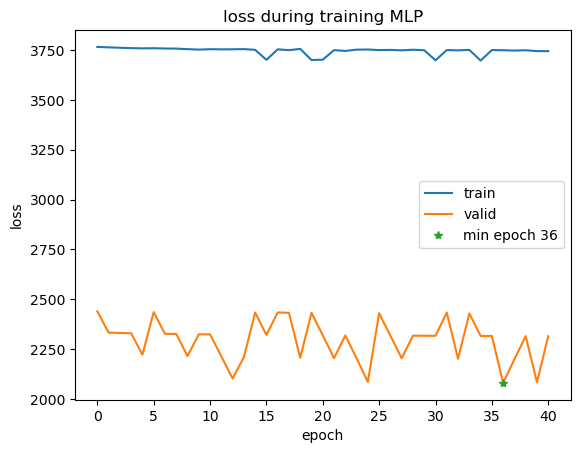

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.533 &  nan &0.938

Epoch:41 [Train] Loss:3747.529 |  [Valid] Loss: 2197.502	EarlyStopping counter: 5 out of 30
Epoch:42 [Train] Loss:3748.962 |  [Valid] Loss: 2430.371	EarlyStopping counter: 6 out of 30
Epoch:43 [Train] Loss:3747.758 |  [Valid] Loss: 2198.736	EarlyStopping counter: 7 out of 30
Epoch:44 [Train] Loss:3747.900 |  [Valid] Loss: 2314.511	EarlyStopping counter: 8 out of 30
Epoch:45 [Train] Loss:3747.301 |  [Valid] Loss: 2430.651	EarlyStopping counter: 9 out of 30
Epoch:46 [Train] Loss:3747.050 |  [Valid] Loss: 2078.861	SAVE MODEL: loss drop: 2080.002 -> 2078.861
Epoch:47 [Train] Loss:3745.368 |  [Valid] Loss: 2314.072	EarlyStopping counter: 1 out of 30
Epoch:48 [Train] Loss:3748.007 |  [Valid] Loss: 2080.636	EarlyStopping counter: 2 out of 30
Epoch:49 [Train] Loss:3747.280 |  [Valid] Loss: 21

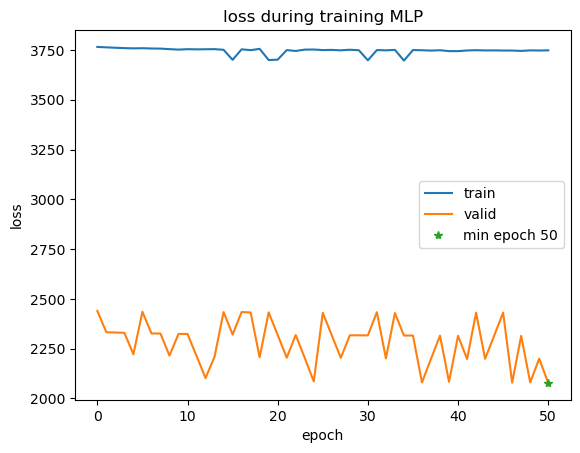

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.515 &  nan &0.934

Epoch:51 [Train] Loss:3747.939 |  [Valid] Loss: 2313.709	EarlyStopping counter: 1 out of 30
Epoch:52 [Train] Loss:3751.411 |  [Valid] Loss: 2197.083	EarlyStopping counter: 2 out of 30
Epoch:53 [Train] Loss:3745.417 |  [Valid] Loss: 2197.690	EarlyStopping counter: 3 out of 30
Epoch:54 [Train] Loss:3747.057 |  [Valid] Loss: 2313.809	EarlyStopping counter: 4 out of 30
Epoch:55 [Train] Loss:3747.898 |  [Valid] Loss: 2196.265	EarlyStopping counter: 5 out of 30
Epoch:56 [Train] Loss:3746.594 |  [Valid] Loss: 2313.541	EarlyStopping counter: 6 out of 30
Epoch:57 [Train] Loss:3751.616 |  [Valid] Loss: 2313.337	EarlyStopping counter: 7 out of 30
Epoch:58 [Train] Loss:3747.672 |  [Valid] Loss: 2195.894	EarlyStopping counter: 8 out of 30
Epoch:59 [Train] Loss:3696.330 |  [Valid] Loss: 2196.922	Ea

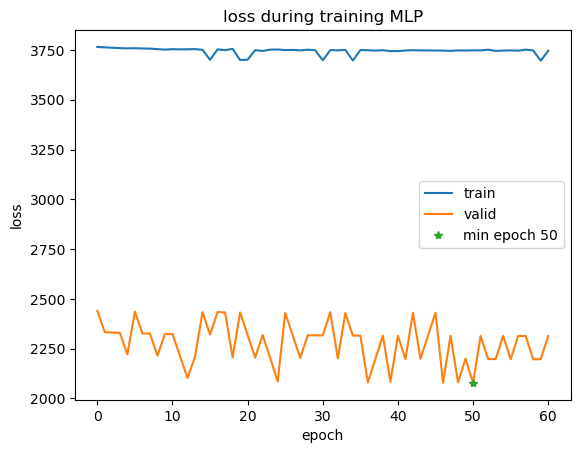

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.492 &  nan &0.928

Epoch:61 [Train] Loss:3747.948 |  [Valid] Loss: 2081.136	EarlyStopping counter: 11 out of 30
Epoch:62 [Train] Loss:3750.966 |  [Valid] Loss: 2313.262	EarlyStopping counter: 12 out of 30
Epoch:63 [Train] Loss:3747.392 |  [Valid] Loss: 2195.250	EarlyStopping counter: 13 out of 30
Epoch:64 [Train] Loss:3746.816 |  [Valid] Loss: 2080.138	EarlyStopping counter: 14 out of 30
Epoch:65 [Train] Loss:3746.665 |  [Valid] Loss: 2078.141	EarlyStopping counter: 15 out of 30
Epoch:66 [Train] Loss:3748.444 |  [Valid] Loss: 2196.468	EarlyStopping counter: 16 out of 30
Epoch:67 [Train] Loss:3746.132 |  [Valid] Loss: 2195.747	EarlyStopping counter: 17 out of 30
Epoch:68 [Train] Loss:3746.145 |  [Valid] Loss: 2195.126	EarlyStopping counter: 18 out of 30
Epoch:69 [Train] Loss:3748.267 |  [Valid] Loss: 219

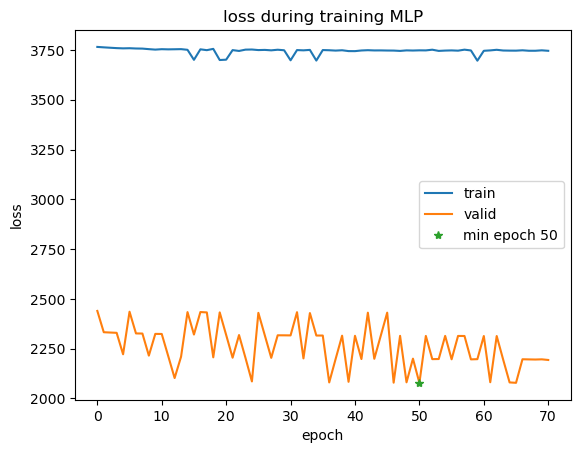

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.500 &  nan &0.929

Epoch:71 [Train] Loss:3746.408 |  [Valid] Loss: 2195.553	EarlyStopping counter: 21 out of 30
Epoch:72 [Train] Loss:3745.638 |  [Valid] Loss: 2194.638	EarlyStopping counter: 22 out of 30
Epoch:73 [Train] Loss:3745.580 |  [Valid] Loss: 2195.385	EarlyStopping counter: 23 out of 30
Epoch:74 [Train] Loss:3748.576 |  [Valid] Loss: 2194.384	EarlyStopping counter: 24 out of 30
Epoch:75 [Train] Loss:3746.222 |  [Valid] Loss: 2312.000	EarlyStopping counter: 25 out of 30
Epoch:76 [Train] Loss:3745.382 |  [Valid] Loss: 2076.482	SAVE MODEL: loss drop: 2077.607 -> 2076.482
Epoch:77 [Train] Loss:3744.696 |  [Valid] Loss: 1957.891	SAVE MODEL: loss drop: 2076.482 -> 1957.891
Epoch:78 [Train] Loss:3745.544 |  [Valid] Loss: 2312.180	EarlyStopping counter: 1 out of 30
Epoch:79 [Train] Loss:3746.396 |  [V

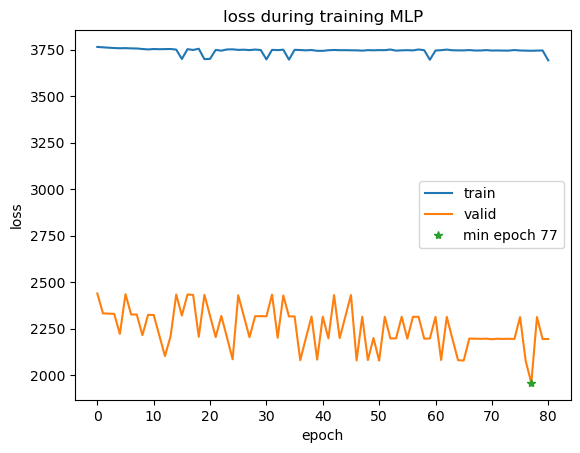

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.514 &  nan &0.931

Epoch:81 [Train] Loss:3746.672 |  [Valid] Loss: 2195.022	EarlyStopping counter: 4 out of 30
Epoch:82 [Train] Loss:3745.522 |  [Valid] Loss: 2193.693	EarlyStopping counter: 5 out of 30
Epoch:83 [Train] Loss:3744.969 |  [Valid] Loss: 2311.869	EarlyStopping counter: 6 out of 30
Epoch:84 [Train] Loss:3746.800 |  [Valid] Loss: 2192.406	EarlyStopping counter: 7 out of 30
Epoch:85 [Train] Loss:3746.541 |  [Valid] Loss: 1952.100	SAVE MODEL: loss drop: 1957.891 -> 1952.100
Epoch:86 [Train] Loss:3747.113 |  [Valid] Loss: 2073.201	EarlyStopping counter: 1 out of 30
Epoch:87 [Train] Loss:3693.204 |  [Valid] Loss: 2311.547	EarlyStopping counter: 2 out of 30
Epoch:88 [Train] Loss:3746.409 |  [Valid] Loss: 1833.325	SAVE MODEL: loss drop: 1952.100 -> 1833.325
Epoch:89 [Train] Loss:3745.378 |  [Valid]

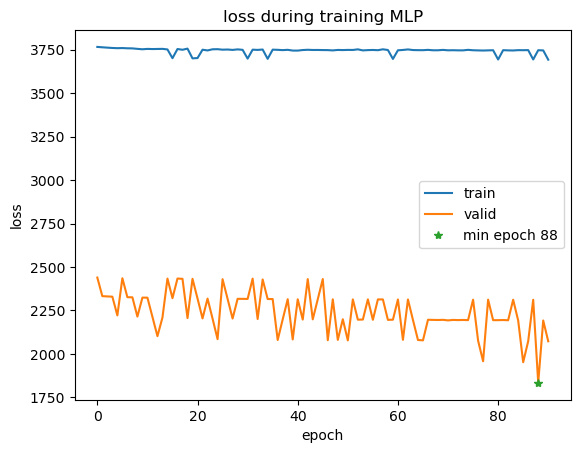

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.504 &  nan &0.929

Epoch:91 [Train] Loss:3745.010 |  [Valid] Loss: 2429.245	EarlyStopping counter: 3 out of 30
Epoch:92 [Train] Loss:3745.338 |  [Valid] Loss: 2192.178	EarlyStopping counter: 4 out of 30
Epoch:93 [Train] Loss:3745.663 |  [Valid] Loss: 2192.004	EarlyStopping counter: 5 out of 30
Epoch:94 [Train] Loss:3744.208 |  [Valid] Loss: 2310.837	EarlyStopping counter: 6 out of 30
Epoch:95 [Train] Loss:3745.450 |  [Valid] Loss: 2429.018	EarlyStopping counter: 7 out of 30
Epoch:96 [Train] Loss:3743.812 |  [Valid] Loss: 2073.700	EarlyStopping counter: 8 out of 30
Epoch:97 [Train] Loss:3745.771 |  [Valid] Loss: 2310.921	EarlyStopping counter: 9 out of 30
Epoch:98 [Train] Loss:3746.430 |  [Valid] Loss: 2191.084	EarlyStopping counter: 10 out of 30
Epoch:99 [Train] Loss:3746.008 |  [Valid] Loss: 2430.149	E

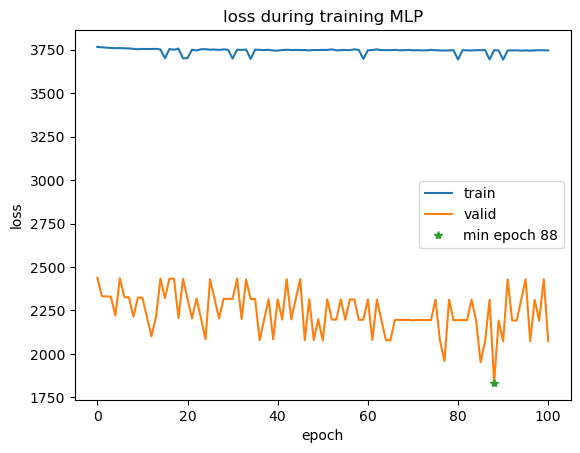

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.506 &  nan &0.927

Epoch:101 [Train] Loss:3694.110 |  [Valid] Loss: 2431.716	EarlyStopping counter: 13 out of 30
Epoch:102 [Train] Loss:3748.636 |  [Valid] Loss: 2191.377	EarlyStopping counter: 14 out of 30
Epoch:103 [Train] Loss:3744.188 |  [Valid] Loss: 2310.911	EarlyStopping counter: 15 out of 30
Epoch:104 [Train] Loss:3747.350 |  [Valid] Loss: 2310.765	EarlyStopping counter: 16 out of 30
Epoch:105 [Train] Loss:3744.986 |  [Valid] Loss: 2429.348	EarlyStopping counter: 17 out of 30
Epoch:106 [Train] Loss:3745.005 |  [Valid] Loss: 2310.966	EarlyStopping counter: 18 out of 30
Epoch:107 [Train] Loss:3744.548 |  [Valid] Loss: 2190.687	EarlyStopping counter: 19 out of 30
Epoch:108 [Train] Loss:3745.438 |  [Valid] Loss: 2310.808	EarlyStopping counter: 20 out of 30
Epoch:109 [Train] Loss:3694.554 |  [Valid] 

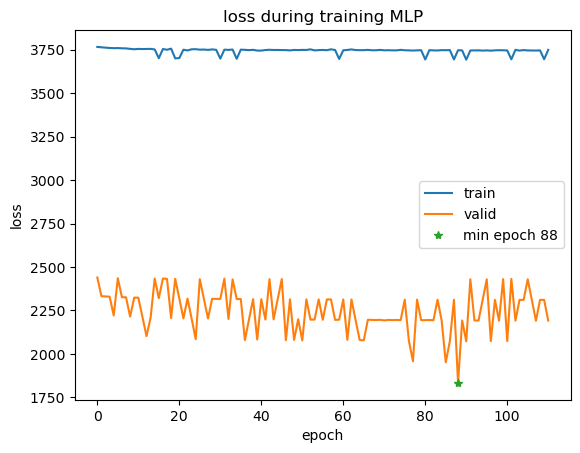

*************** diarrhoea ***************
TN: 0; FP: 7; FN: 0; TP: 74
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.914  &0.500  &0.914  &1.000  &0.000  &0.955 &0.521 &  nan &0.929

Epoch:111 [Train] Loss:3745.786 |  [Valid] Loss: 2070.801	EarlyStopping counter: 23 out of 30
Epoch:112 [Train] Loss:3743.729 |  [Valid] Loss: 2310.518	EarlyStopping counter: 24 out of 30
Epoch:113 [Train] Loss:3745.389 |  [Valid] Loss: 2310.760	EarlyStopping counter: 25 out of 30
Epoch:114 [Train] Loss:3743.793 |  [Valid] Loss: 2191.760	EarlyStopping counter: 26 out of 30
Epoch:115 [Train] Loss:3745.580 |  [Valid] Loss: 2427.738	EarlyStopping counter: 27 out of 30
Epoch:116 [Train] Loss:3692.076 |  [Valid] Loss: 2428.800	EarlyStopping counter: 28 out of 30
Epoch:117 [Train] Loss:3744.445 |  [Valid] Loss: 2190.974	EarlyStopping counter: 29 out of 30
Epoch:118 [Train] Loss:3745.752 |  [Valid] Loss: 2071.227	EarlyStopping counter: 30 out of 30
early stop
Finished training 



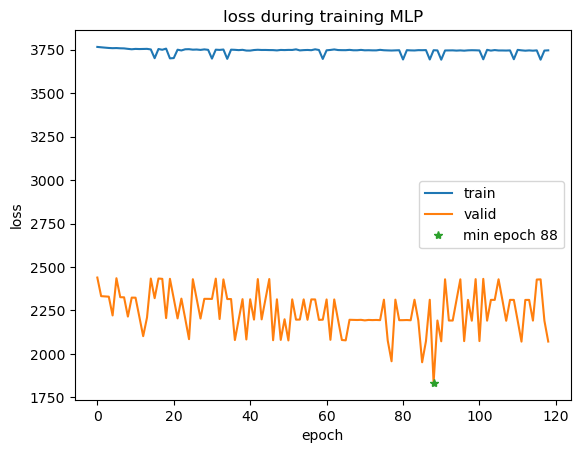

load model from path:  test.pt
***************  ***************
TN: 0; FP: 7; FN: 0; TP: 64
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.901  &0.500  &0.901  &1.000  &0.000  &0.948 &0.623 &  nan &0.939


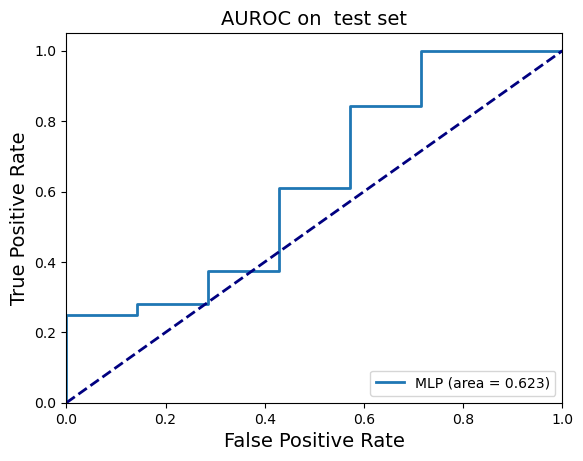

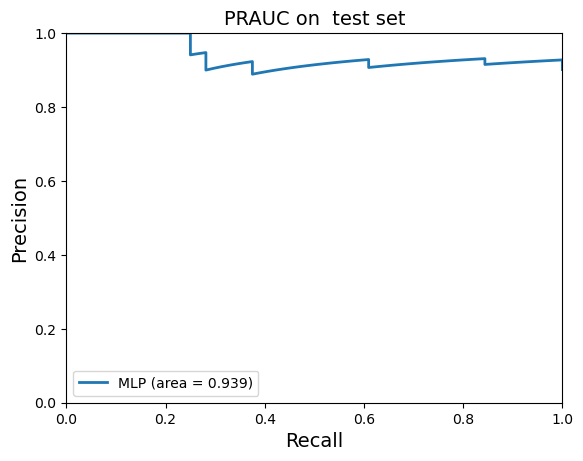


TN: 0; FP: 7; FN: 0; TP: 64
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.901  &0.500  &0.901  &1.000  &0.000  &0.948 &0.623 &  nan &0.939
Fold 2
-------
Epoch:0 [Train] Loss:4125.453 |  [Valid] Loss: 2287.896	EarlyStopping counter: 31 out of 30
SAVE MODEL: loss drop: inf -> 2287.896
early stop
Finished training 



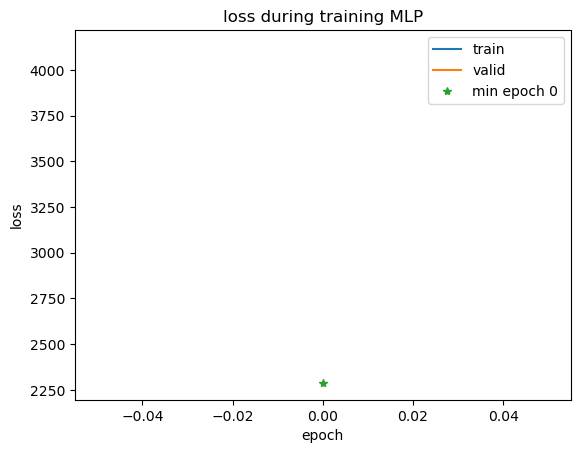

load model from path:  test.pt
***************  ***************
TN: 0; FP: 7; FN: 1; TP: 63
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.887  &0.492  &0.900  &0.984  &0.000  &0.940 &0.326 &-0.040 &0.882


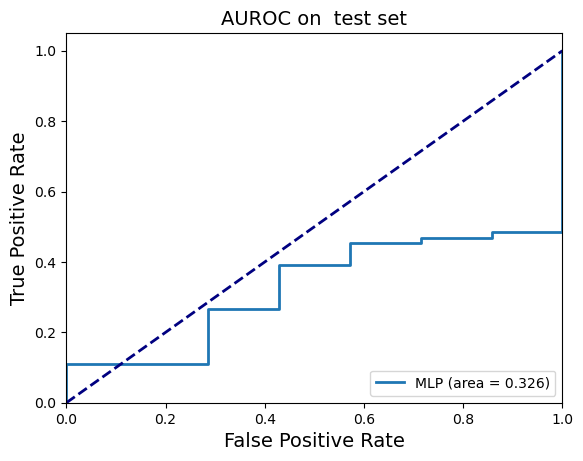

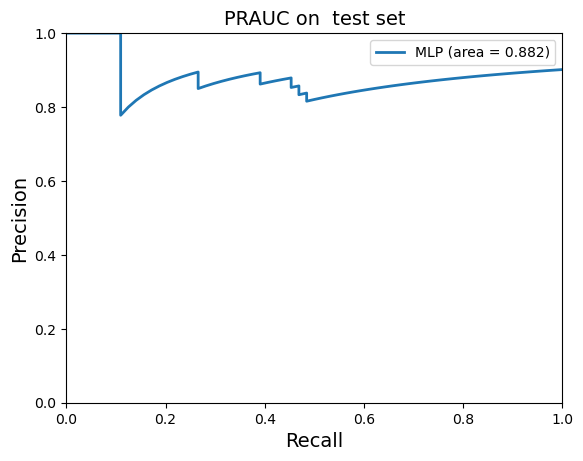


TN: 0; FP: 7; FN: 1; TP: 63
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.887  &0.492  &0.900  &0.984  &0.000  &0.940 &0.326 &-0.040 &0.882
Fold 3
-------
Epoch:0 [Train] Loss:3920.265 |  [Valid] Loss: 2907.018	EarlyStopping counter: 32 out of 30
SAVE MODEL: loss drop: inf -> 2907.018
early stop
Finished training 



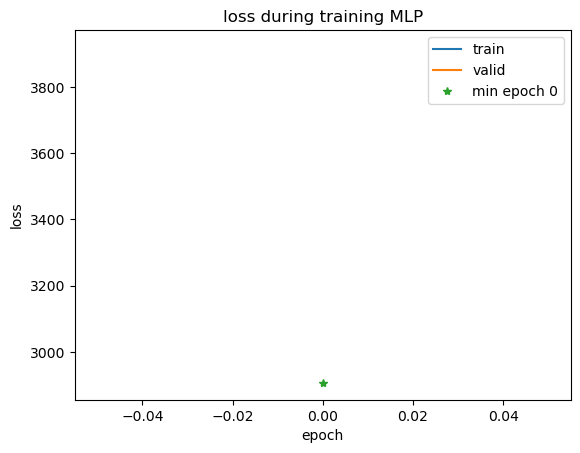

load model from path:  test.pt
***************  ***************
TN: 6; FP: 1; FN: 33; TP: 31
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.521  &0.671  &0.969  &0.484  &0.857  &0.646 &0.741 &0.205 &0.967


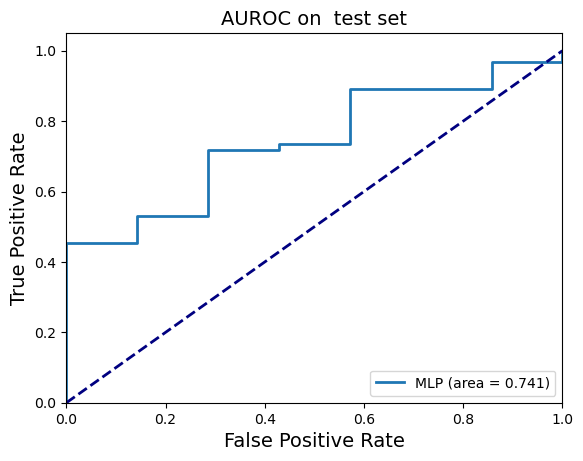

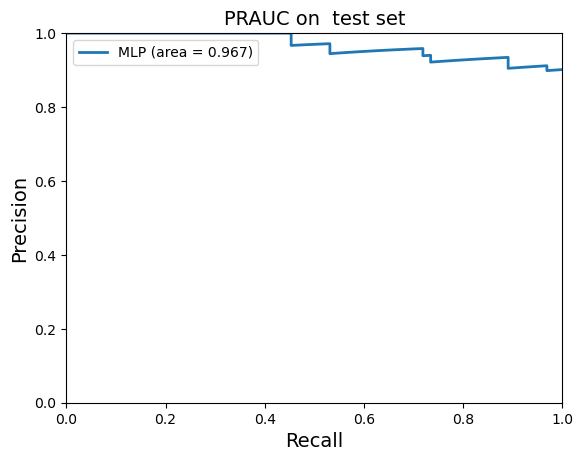


TN: 6; FP: 1; FN: 33; TP: 31
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.521  &0.671  &0.969  &0.484  &0.857  &0.646 &0.741 &0.205 &0.967
Fold 4
-------
Epoch:0 [Train] Loss:3677.685 |  [Valid] Loss: 2448.920	EarlyStopping counter: 33 out of 30
SAVE MODEL: loss drop: inf -> 2448.920
early stop
Finished training 



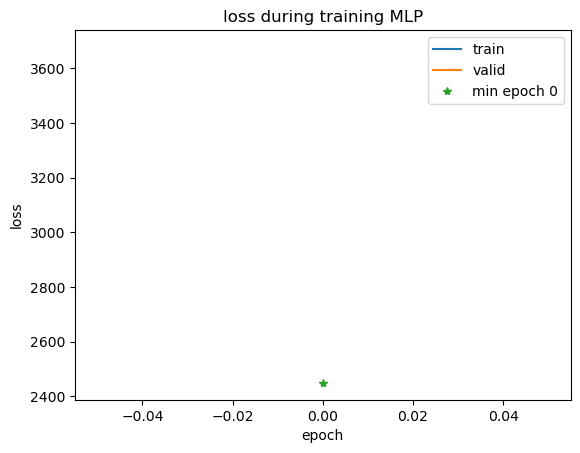

load model from path:  test.pt
***************  ***************
TN: 7; FP: 0; FN: 61; TP: 3
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.141  &0.523  &1.000  &0.047  &1.000  &0.090 &0.558 &0.069 &0.932


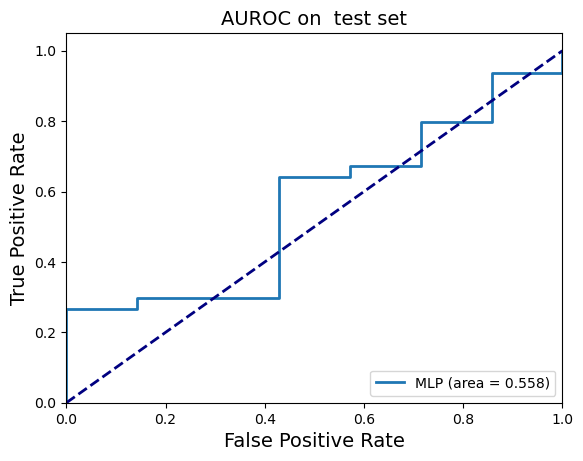

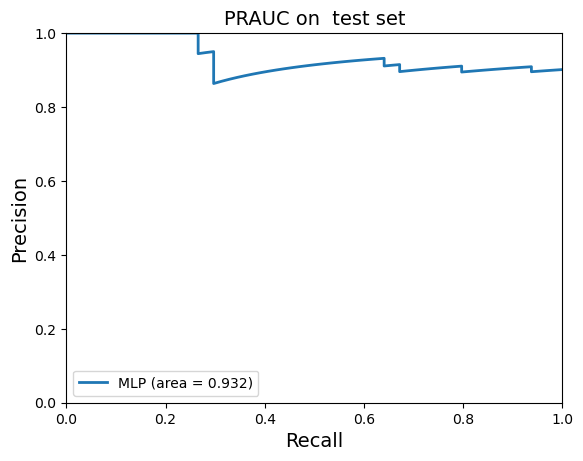


TN: 7; FP: 0; FN: 61; TP: 3
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.141  &0.523  &1.000  &0.047  &1.000  &0.090 &0.558 &0.069 &0.932
Fold 5
-------
Epoch:0 [Train] Loss:3526.430 |  [Valid] Loss: 2234.132	EarlyStopping counter: 34 out of 30
SAVE MODEL: loss drop: inf -> 2234.132
early stop
Finished training 



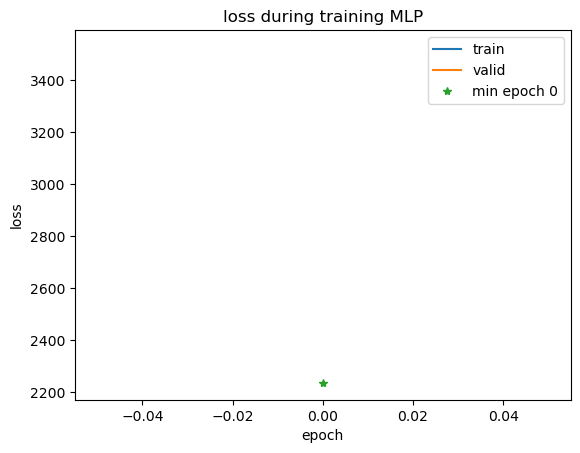

load model from path:  test.pt
***************  ***************
TN: 7; FP: 0; FN: 59; TP: 5
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.169  &0.539  &1.000  &0.078  &1.000  &0.145 &0.623 &0.091 &0.942


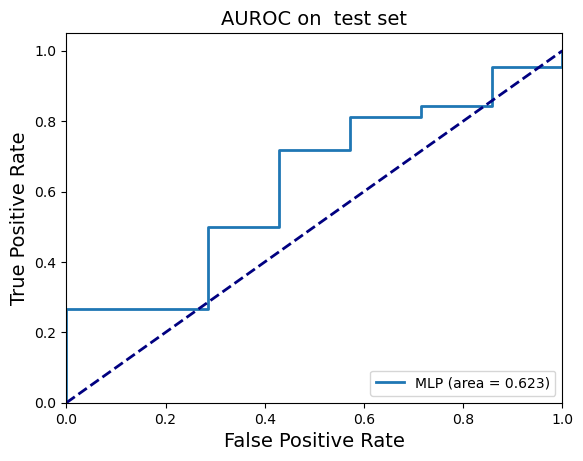

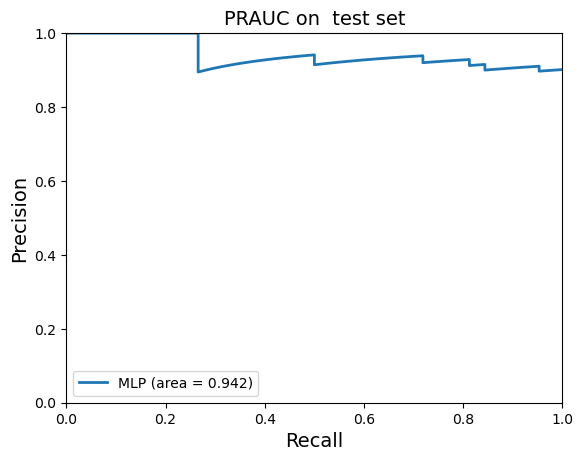


TN: 7; FP: 0; FN: 59; TP: 5
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.169  &0.539  &1.000  &0.078  &1.000  &0.145 &0.623 &0.091 &0.942


In [10]:
"modify weight_loss: list, the higher the num, more penalize if predict label 0 wrong"
from sklearn.model_selection import KFold
from ml_utils import *

k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True)

train_dataset = tox_dataset(train_df, ae_name)
test_loader = DataLoader(tox_dataset(test_df, ae_name), **params)

weight_losses = [7.0, 8.0, 8.0, 7.0, 6.0]

results = {
    "acc": [],
    "precision": [],
    "recall": [],
    "F1": [],
    "TP": [],
    "TN": [],
    "FP": [],
    "FN": [],
    "cohen": []
}
for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold + 1}")
    print("-------")

    stopper = EarlyStopping(mode='lower', patience=patience)
    train_loader = DataLoader(
        train_dataset,
        batch_size=64,
        sampler=torch.utils.data.SubsetRandomSampler(train_idx),
    )
    val_loader = DataLoader(
        train_dataset,
        batch_size=64,
        sampler=torch.utils.data.SubsetRandomSampler(val_idx),
    )

    model = Classifier(in_dim, h_dims)
    if torch.cuda.is_available(): model = model.cuda()
    optimizer = optim.AdamW(params=model.parameters(), lr=lr, weight_decay=wd)

    train(model, train_loader, val_loader, weight_loss=weight_losses[fold], optimizer=optimizer, ae_name=ae_name)
    _, probs, label = eval(model, test_loader, model_path)
    preds = get_preds(0.5, probs)
    cls_results = evaluate(label, preds, probs)
    # [ACCURACY, weighted_accuracy, precision, SE, SP, F1, AUC, MCC, AP]
    for key in cls_results:
        results[key].append(cls_results[key])

for key in results:
    results[key].append(np.mean(results[key]))

results_df = pd.DataFrame.from_dict(results)
results_df.to_csv(f"{ae_name}_results.csv", index=False)
